# Прогнозирование оттока клиентов в телекоммуникационной компании
<br>
Предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>
Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят).

## Структура данных
<br>

`telecom_users.csv` <br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [3]:
# загрузка необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats import skew
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold, cross_val_predict, cross_val_score, RandomizedSearchCV)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LassoCV, LinearRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
# загрузка данных пользователей
tel_users = pd.read_csv('telecom_users.csv')
# копия данных
df_users = tel_users.copy()
tel_users.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Данные содержат 22 числовых и категориальных признаков

In [5]:
# форма данных
tel_users.shape[0]

5986

В данных присутствует 5986 обьектов



In [6]:
# проверка данных на наличие пропусков
tel_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


Пропусков в данных нет, но есть признаки с неопределенным типом.

In [7]:
# В колонке TotalCharges присутствуют строки без информации, заполним их
# заполнение пустых строк в столбце с данными суммы, которую клиент заплатил за услуги за все время
for i,j in enumerate(tel_users['TotalCharges']):
    if j == ' ':
      tel_users['TotalCharges'][i] = tel_users['tenure'][i] * tel_users['MonthlyCharges'][i]
tel_users['TotalCharges'] = tel_users['TotalCharges'].astype(float)

# данные с номером индекса и индификатором клиента не нужны для решения задачи
tel_users.drop(['customerID'], axis=1, inplace=True)
tel_users.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
# основные статистики числовых признаков
tel_users.describe(percentiles=[.75, .99])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
99%,1.000000,72.000000,114.900000,8058.595000
max,1.000000,72.000000,118.750000,8684.800000


Был добавлен 99 квантиль, чтобы "поймать" аномальные значения, которые могут ухудшить предсказание моделей. Признаки MonthlyCharges и	TotalCharges имеют наличие аномалий(значений выходящих за 99 квантиль).

In [9]:
# Признаки tenure и TotalCharges есть нулевые значения, что странно.
# Проверим этих людей.
# текущий статус клиентов
tel_users.loc[(tel_users['tenure']==0.0) & (tel_users['TotalCharges']==0.0)]['Churn']

356     No
634     No
2771    No
3086    No
3255    No
4326    No
5375    No
5382    No
5695    No
5951    No
Name: Churn, dtype: object

Все выбранные люди являются клиентами компании на данный момент. Эти люди похожи на новых клиентов, которые только заключили договор с компанией.

In [10]:
# статистики по категориальным данным
tel_users.describe(include=[np.object])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


Среди уникальных значений, данных признаков, не замеченно аномалий.

In [11]:
# колонки с категориальными данными, преобразуем в числовые для использования их в обучении моделей
columns = ['Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
for col in columns:
    tel_users = pd.get_dummies(tel_users, columns=[col])

# отображение колонки пола
tel_users['gender'] = tel_users['gender'].map( {'Male': 0, 'Female': 1} ).astype(int)

# отображение колонки брака
tel_users['Partner'] = tel_users['Partner'].map( {'Yes': 1, 'No': 0} ).astype(int)

# отображение колонки оттока
tel_users['Churn'] = tel_users['Churn'].map( {'No': 0, 'Yes': 1} ).astype(int)

# преобразованные данные
tel_users.head(3)

,gender,SeniorCitizen,Partner,tenure,MonthlyCharges,TotalCharges,Churn,Dependents_No,Dependents_Yes,PhoneService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0,0,1,72,24.10,1734.65,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
1,1,0,0,44,88.15,3973.20,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
2,1,1,1,38,74.95,2869.85,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [12]:
# форма данных
tel_users.shape

(5986, 44)

После предварительной обработки, в данных присутствуют 5986 обьектов с 44 числовыми признаками. Признаков получилось довольно много, скорее всего присутствует много дублирующих признаков, которые появились, из-за использования функции get_dummies(). На следующем этапе исследования данных, постараемся убрать лишние, неинформативные признаки.

Выводы:
- В среднем, человек являлся клиентом компании - **32,5** месяца, медианное кол-во месяцев - **29**;
- Средний месячный размер оплаты составляет - **64.8** ед., медианное значение - **70,4** ед., минимальны размер оплаты - **18,3** ед.;
- Средняя общая сумма, которую клиент заплатил за услуги за все время - **2294,2** ед., медианное значение - **1408.6** ед.;
- Среди клиентов, неженатых мужчин немного больше, чем женщин. Немного преобладают клиенты без детей, младше пенсионного возраста, оплачивающие услуги каждый месяц;
- Большая часть клиентов не пользуется дополнительными услугами;
- Большая часть клиентов предпочитает в качестве интернет-провайдера Fiber optic и оплачивает услуги методом - Electronic check;
- У большинства клиентов подключена услуга PhoneService;
- Большая часть клиентов являются лояльными.

# 2. Исследование зависимостей и формулирование гипотез

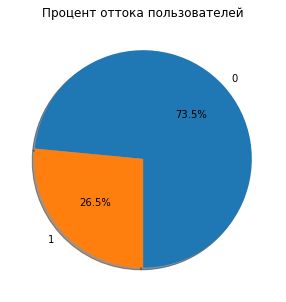

In [13]:
# Целевым признаком является Churn

# визуализируем разбиение оттока пользователей в процентах
sizes = tel_users['Churn'].value_counts(sort = True)
colors = None 
rcParams['figure.figsize'] = 5,5 
plt.pie(sizes, labels=tel_users['Churn'].unique(), colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Процент оттока пользователей')
plt.show()

На графике видно, что 73.5% пользователей являются лояльными компании, а 26.5% клиентов ушли. Присутствует ощутимый дисбаланс между двумя классами. 

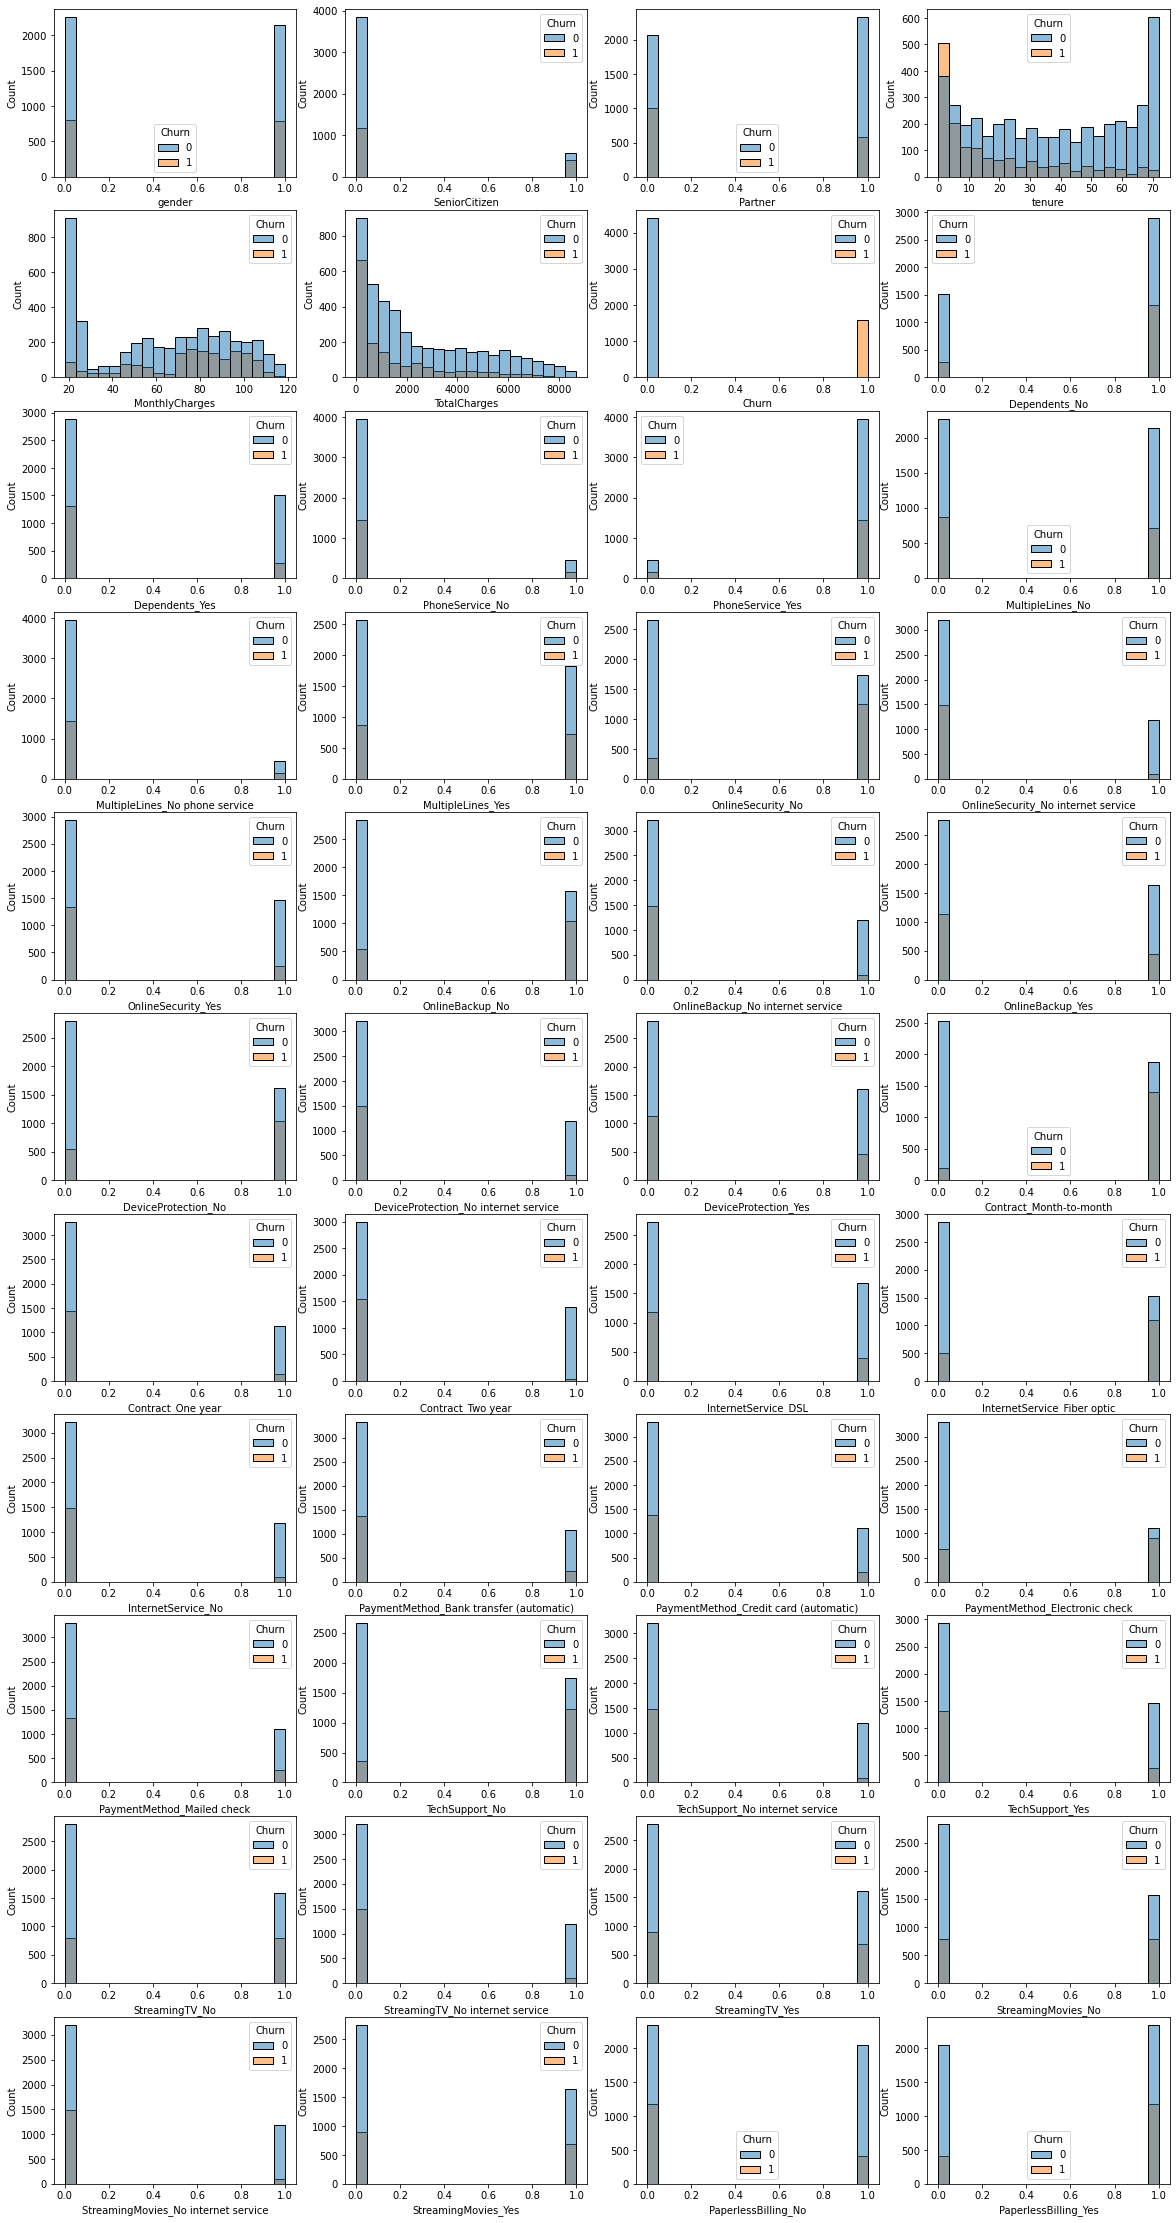

In [14]:
# Посмотрим на соотношение двух целевых групп в каждом из признаков

# Визуализация связи признаков с целевой переменной
# инициализируем график(задаем размеры будущей визуализации, кол-во графиков, их расположение, а так же их размер)
# Получим обьекты класса Figure и Axses
fig, axes = plt.subplots(11, 4, figsize=(20,40))
for i, ax in zip(tel_users, axes.flat):
  sns.histplot(data=tel_users, x=i, hue='Churn', ax=ax, alpha=0.5, bins=20)

Сильный дисбаланса между двумя целевыми классми, создает сложности для анализа.
Попробуем обратить внимание на обратные зависимости  с целевой переменной, которые сильнее видны.  
Из полученных гистограмм видно, что признак tenure имеется обратная зависимость группы оттока с группой лояльных клиентов, т.е, чем больше месяцев человек является клиентом компании, тем меньше вероятность, того, что он ее покинет.

Больше половины клиентов, которые являются пенсионерами, попадают в группу оттока. 

В группе оттока преобладают люди с типом котракта month-to-month.

Признак Partner имеет обратную корреляцию с целевой группой

Покупатели с низкими ежемесячными платежами (<30 ед.) вероятнее остануться с компанией.

Вероятность, что клиент покинет компанию выше, если интернет-провайдером клиента является Fiber_optic.

Отсутствие услуг: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, PaymentMethod_Electronic_check делает клиента менее лояльным.

In [15]:
# Визуально видно, что В распределениях признаков tenure, TotalCharges и MonthlyCharges присутствует ассиметрия.
[(skew(tel_users[i]), i) for i in tel_users[['tenure', 'TotalCharges', 'MonthlyCharges']]]

[(0.23376356878372992, 'tenure'),
 (0.9510332338710766, 'TotalCharges'),
 (-0.21862368693019338, 'MonthlyCharges')]

In [16]:
# На графиках tenure, TotalCharges правая ассиметрия, а на графике MonthlyCharges левая ассиметрия
# Ассиметрия говорит об отклонении от нормального распределения. Проведем логарифмирование данных, 
# сделаем их более нормальными, чтобы результаты статистического анализа этих данных стал более достоверным

# В данных tenure и TotalCharges есть нулевые значения, заменим их на сильно отрицательную степень
tel_users['tenure'] = tel_users['tenure'].apply(lambda x: np.log(x) if x != 0.0 else -20)
tel_users['TotalCharges'] = tel_users['TotalCharges'].apply(lambda x: np.log(x) if x != 0.0 else -20)
tel_users['MonthlyCharges'] = np.log(tel_users['MonthlyCharges'])

In [17]:
# Поиск аномальных значений

# в признакaх MonthlyCharges и TotalCharges, ранее были найдены аномальные значения, которые не являются характерными для этих данных
# так как мы хотим найти общие закономерности в данных, то какие-то отдельные значения, которые не вписываются в общую картину, будут нам мешать.

# Удаление аномальных значений
tel_users['MonthlyCharges'][tel_users['MonthlyCharges'] > tel_users['MonthlyCharges'].quantile(.99)] = tel_users['MonthlyCharges'].median()
tel_users['TotalCharges'][tel_users['TotalCharges'] > tel_users['TotalCharges'].quantile(.99)] = tel_users['TotalCharges'].median()

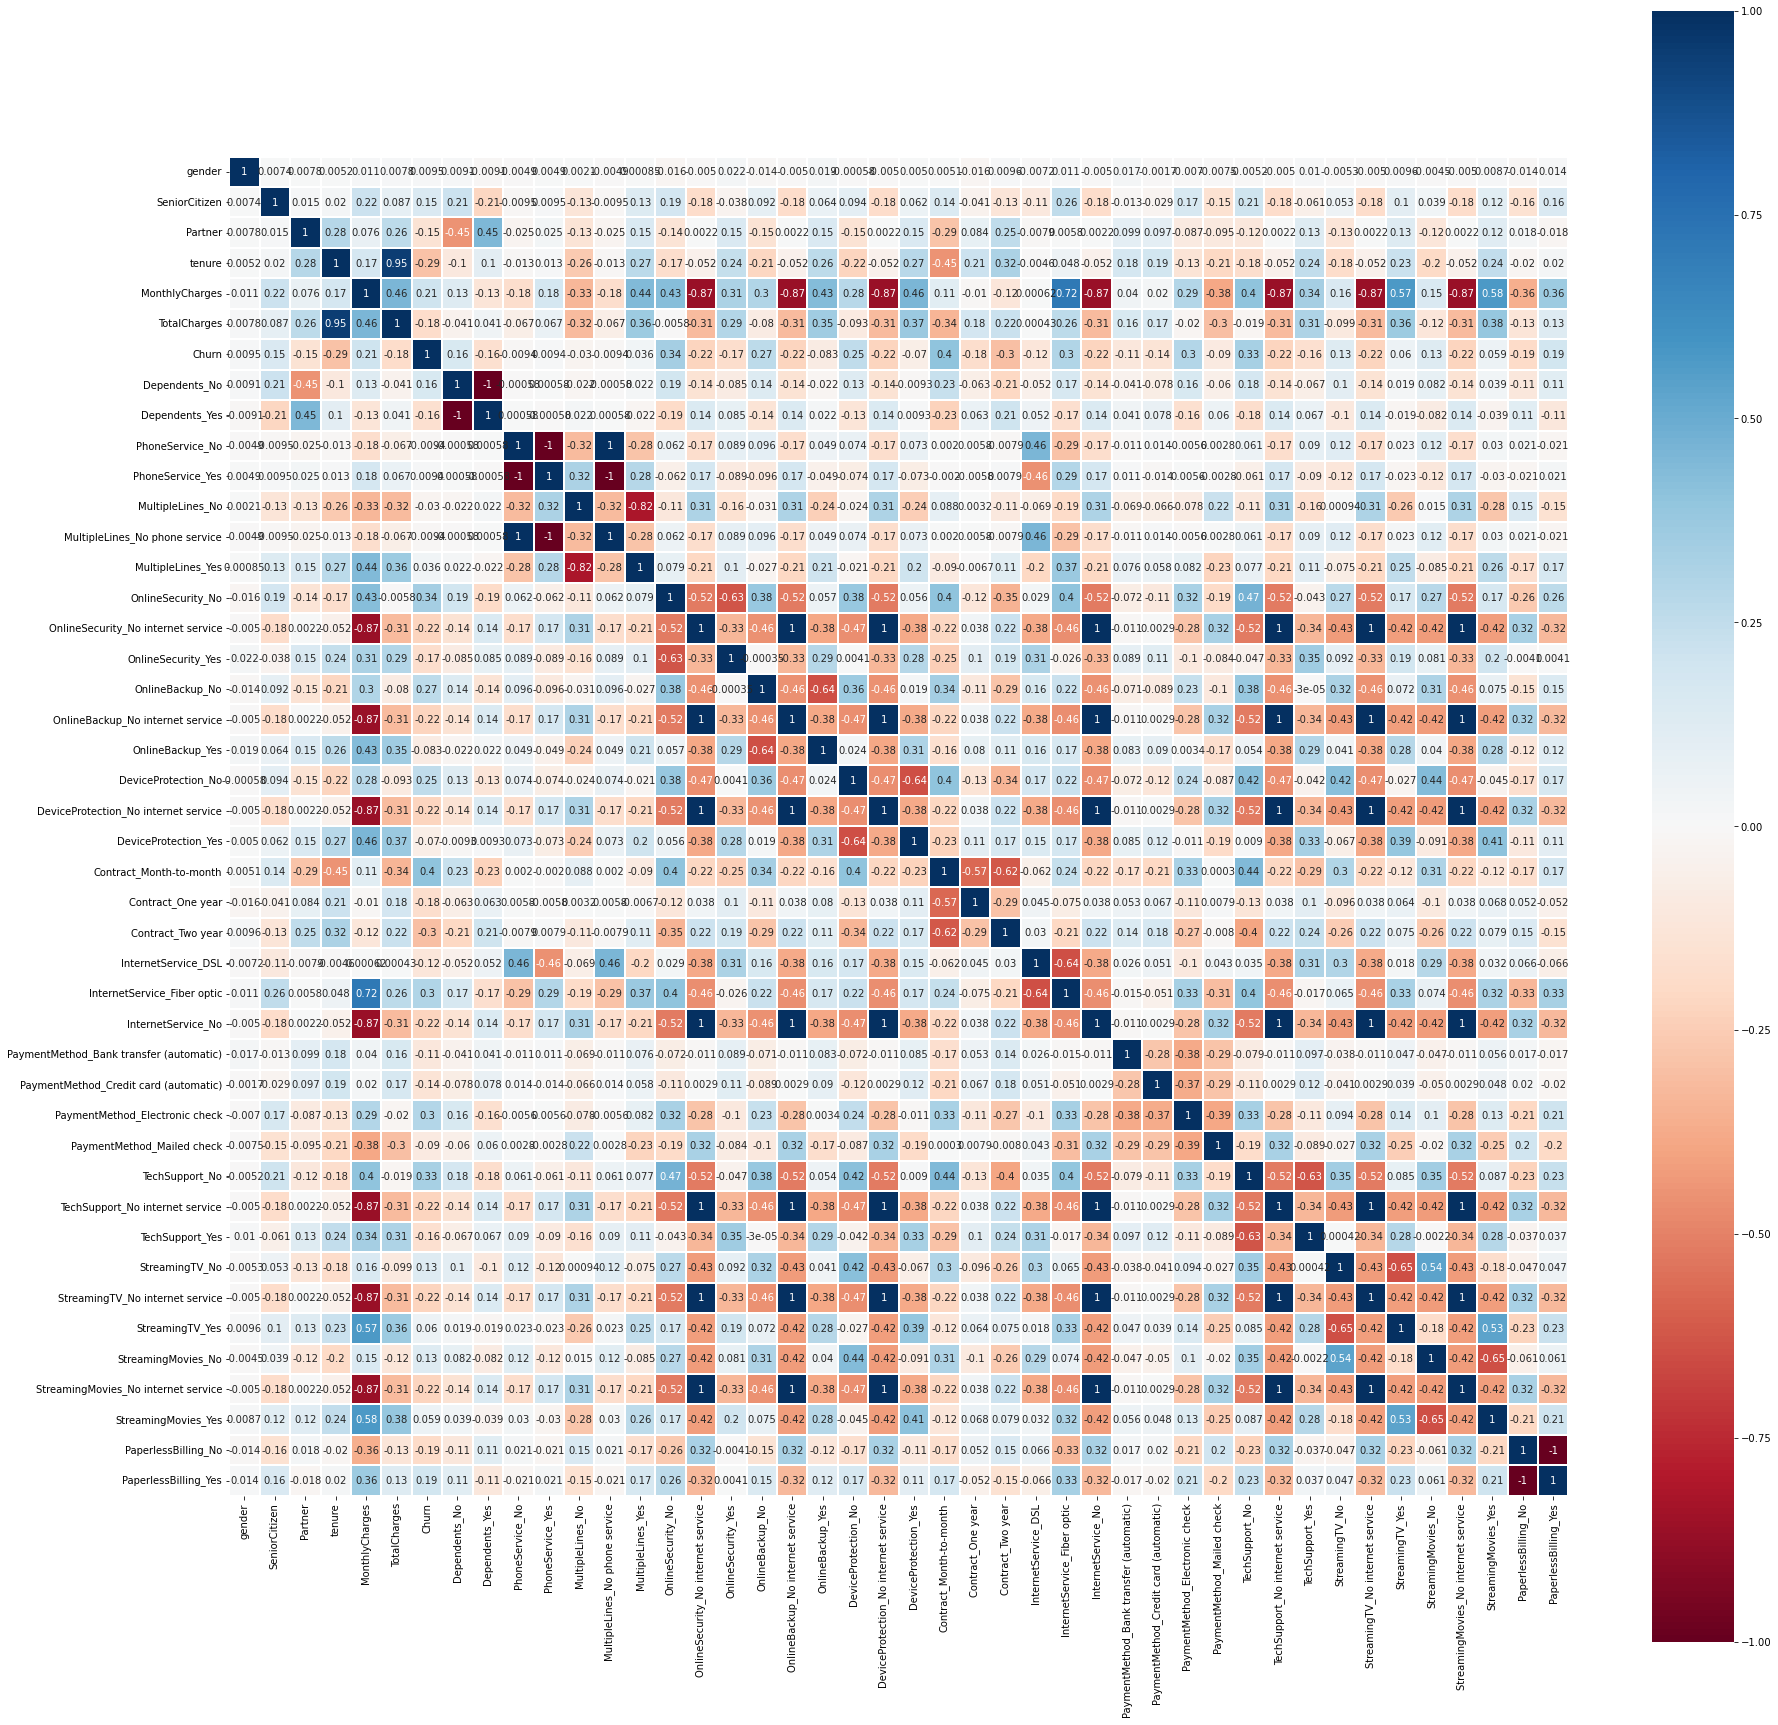

In [18]:
# Визуализируем матрицу парных корреляций полученных признаков

# создание цветовой карты
colormap = plt.cm.RdBu
# задание размеров матрицы
plt.figure(figsize=(30,30))

sns.heatmap(tel_users.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# вывод матрицы корреляций
plt.show()

Признаки: OnlineBackup_No internet service, DeviceProtection_No internet service, InternetService_No, TechSupport_No internet service, PhoneService_No, MultipleLines_No phone service, StreamingTV_No internet service, StreamingMovies_No internet service,  имеют множество аналогов, поэтому их можно удалить
А так же Dependents_No, PaperlessBilling_Yes имеют обратные аналоги, их тоже можно удалить

In [19]:
# удаление аналоговых признаков
tel_users = tel_users.drop(['OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'InternetService_No', 'TechSupport_No internet service', 
'StreamingTV_No internet service', 'PaperlessBilling_Yes', 'Dependents_No', 'StreamingMovies_No internet service', 'PhoneService_No', 'MultipleLines_No phone service'], axis=1)

In [20]:
# форма данных
tel_users.shape

(5986, 34)

После анализа признаков, в данных присутствуют 5986 обьектов с 34 числовыми признаками.

Выводы:
1. Были удалены признаки:
- OnlineBackup_No internet service, DeviceProtection_No internet service, InternetService_No, TechSupport_No internet service, PhoneService_No, MultipleLines_No phone service, StreamingTV_No internet service, StreamingMovies_No internet service, Dependents_No, PaperlessBilling_Yes - из-за наличия аналогов.

- В признаках MonthlyCharges и TotalCharges, аномальные значения были заменены на медианные значения.
2. Признак tenure имеет обратную зависимость с целевой переменной, чем больше месяцев человек является клиентом компании, то тем меньше вероятность того, что он ее покинет. Если клиент не покинул компанию после 5-8 месяцев обслуживания, то вероятность его ухода сильно снижается.
Если клиент покидает компанию, то он чаще состоит в браке, чем нет.
Больше половины клиентов, которые являются пенсионерами, попадают в группу оттока. Лояльность клиентов, которые начинают платить более 30 ед. за услуги, сильно падает.
Клиенты с типом котракта month-to-month, склонны к оттоку.
Вероятность, что клиент покинет компанию выше, если интернет-провайдером клиента является Fiber_optic.
Отсутствие услуг: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, InternetService_Fiber_optic, PaymentMethod_Electronic_check делает клиента менее лояльным.
Последние два заключения являются спорными, так как у большинства клиентов интернет-провайдером является Fiber_optic и не подключены дополнительные услуги.
В принципе, навязывание дополнительных услуг не добавляет лояльности клиентам, так что позже, проверим эти утверждения.

3. В целом, наличие корреляционых связей между целевой переменной и признаками выглядит слабым. Попробуем использовать два подхода к построению моделей.
1 подход: возьмем линейные модели, особенно LogisticRegression(если линейная связь все же есть) и Lasso (которая, удалит лишние признаки). С помощью PolynomialFeatures создадим новую матрицу признаков, состоящую из всех полиномиальных комбинаций признаков со степенью 2. Возможно это усилит связи между данными.
2 подход: используем нелинейные модели, knn и метод ближайших соседей, которые хорошо подходят для решения задач классификации. Используем: Градиентный бустинг, Экстремальный градиентный бустинг, Байясовский классификатор и т.д. С помощью Feature Importance определим наиболее важные признаки.
Для сравнения моделей между собой будем использовать метрику ROC-AUC, т.к она позволяет объективно сопоставить уровень качества разных моделей классификации, решающих одну и ту же задачу, но обученных на разных данных.

# 3. Построение моделей для прогнозирования оттока

**Подготовим данные**

In [21]:
# Данные с целевой переменной
y = tel_users['Churn'].values
# данные с независимыми переменными
X = tel_users.drop(labels = ["Churn"],axis = 1)
# разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
# данные имеют разные диапазоны значений
# стандартизация данных
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

**Подбор признаков для линейных моделей**




In [22]:
# Так как матрица корреляций показала слабые линейные зависимости между признаками и целевой переменной
# преобразуем векторы признаков в пространство с большим количеством измерений

# Генерация новой матрицы признаков, состоящей из всех полиномиальных комбинаций признаков с мах степенью 2
# инициализация обьекта PolynomialFeatures
poly = PolynomialFeatures(2)
# трансформация данных для тренировочной и тестовой выборок
X_train_lin = poly.fit_transform(X_train)
X_test_lin = poly.fit_transform(X_test)

In [23]:
# параметры алгоритмов
lr_params = {'C' : range(1, 10), 'penalty': ['l1', 'l2'] } # LogisticRegression
ridge_params = {'alpha': np.arange(0.1, 10.0, 0.1)}
# lasso_params = {'alpha': np.arange(0.001, 0.1, 0.01)}


skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True).get_n_splits(X_train_lin, y_train)
# Cs = np.logspace(-1, 2, num=500)
# LogisticRegressionCV(Cs=Cs, cv=skf, scoring='roc_auc', random_state=17)

lasso_cv = LassoCV(alphas=[0.01], cv = skf, max_iter = 100000).fit(X_train_lin, y_train)
lasso_model = Lasso().set_params(alpha = lasso_cv.alpha_) 


# создание словаря с параметрами моделей для их оптимизации 
best_params = {LogisticRegression(random_state=17): lr_params, 
               Ridge(): ridge_params}

# список моделей с оптимизированными данными
lin_models = []
for model, param in best_params.items():
  # создание обьекта GridSearchCV
  grid = GridSearchCV(model, param, cv=5)
  # обучение обьекта GridSearchCV
  grid.fit(X_train_lin, y_train)
  # передача модели наилучших параметров
  lin_models.append(model.set_params(**grid.best_params_))

lin_models.append(lasso_model)
# добавление в список моделей модели Линейной регрессии 
lin_models.append(LinearRegression())

In [24]:
# списка значений долей уверенности моделей в выборе класса
lin_scores = []
# кросс-валидация моделей с получением списка значений долей уверенности моделей
for n, model in enumerate(lin_models):
    score = cross_val_score(model, X_train_lin, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
    lin_scores.append(score)
# список названий использованых моделей
lin_model_col = ['Логистическая регресси', 'Гребневая регрессия', 'Лассо', 'Линейная регрессия'] 
# таблица метрики AUC ROC моделей
pd.DataFrame({'AUC': np.array(lin_scores).mean(axis=1)}, index=lin_model_col)

,AUC
Логистическая регресси,0.823629
Гребневая регрессия,0.830717
Лассо,0.845962
Линейная регрессия,0.827504


Лучший результат показала Лассо регуляризация (AUC ROC = 0.85), на которую возлагались надежды, из за большого кол-ва признаков, которые образовались за счет появления их полиномиальных комбинаций.

**Подбор признаков для нелинейных моделей и SVD**

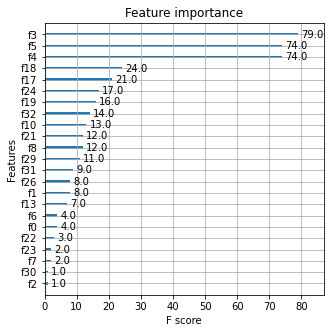

In [26]:
# отбор признаков с помощью алгоритма xgboost 
# представление данных в виде обьекта DMatrix для обучения модели xgboost
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

# параметры алгоритма
xgb_params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'learning_rate': 0.1}
# количество итераций бустинга
num_rounds = 60

# обучение модели
xgb_model = xgb.train(xgb_params, dtrain, num_rounds)

# # инициализируем обьект XGBClassifier
# xgb = XGBClassifier(cv=5, random_state=17)
# F-score признаков, которая вычисляется на основе того, как часто делалось разбиение по данному признаку
xgb.plot_importance(xgb_model);

In [27]:
# признаки которые используются больше всего, которые важны для обучения моделей
best_features = [4, 3, 5, 18, 17, 24, 19, 32, 10, 21, 8, 29, 31, 26, 1, 13, 6, 0, 22] 

In [28]:
# наиболее важные признаки
X_train = X_train[:, best_features]
X_test = X_test[:, best_features]

In [29]:
# параметры базовых алгоритмов
# ada_params = {'n_estimators' : [1] + list(range(10, 100, 10))} # AdaBoostClassifier
gbc_params = {'n_estimators': np.arange(10, 100, 10), 
              'max_depth': np.arange(2, 10, 2),
              'learning_rate': np.arange(0.1, 0.3, 0.1)} # GradientBoostingClassifier
xgb_params = {'n_estimators': np.arange(10, 100, 10),
             'max_depth': np.arange(2, 10, 2),
             'learning_rate': np.arange(0.1, 0.3, 0.1),
             'scale_pos_weight':[3]} # XGBClassifier

knn_params = {'n_neighbors' : range(1, 10)} # KNeighborsClassifier
svc_params = {'degree' : range(1, 10), 'probability': [True]} # SVC


# создание словаря с параметрами моделей для их оптимизации 
best_params = {GradientBoostingClassifier(random_state=17): gbc_params,
               XGBClassifier(random_state=17): xgb_params, 
               KNeighborsClassifier(): knn_params, SVC(random_state=17): svc_params}


# список моделей с оптимизированными данными
models = []
for model, param in best_params.items():
  # создание обьекта GridSearchCV
  grid = GridSearchCV(model, param, scoring='roc_auc', cv=5, n_jobs=-1)
  # обучение обьекта GridSearchCV
  grid.fit(X_train, y_train)
  # передача модели наилучших параметров
  models.append(model.set_params(**grid.best_params_))
# добавление в список моделей модели Байесовского классификатора 
models.append(GaussianNB())

In [30]:
# список значений метрики качества модели
scores = []
# кросс-валидация моделей с получением списка значений метрики качества модели
for n, model in enumerate(models):
    score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
    scores.append(score)
# список названий использованых моделей
model_col = ['GradientBoosting', 'XGBClassifier', 'Метод К-ближайших соседей', 'Метод опорных векторов', 'GaussianNB'] 
# таблица метрики AUC ROC моделей
pd.DataFrame({'AUC': np.array(scores).mean(axis=1)}, index=model_col)

,AUC
GradientBoosting,0.848186
XGBClassifier,0.847314
Метод К-ближайших соседей,0.808689
Метод опорных векторов,0.793852
GaussianNB,0.832731


Модель Стекинга

In [31]:
# создание списка мета-моделей
meta_models = models.copy()
# определение мета-алгоритма
xgb = meta_models.pop(1)

In [32]:
# инициализация матрицы метапризнаков 
meta_mtrx = np.empty((y_train.shape[0], len(meta_models)))
for n, model in enumerate(meta_models):
    # заполнение матрицы meta_mtrx значениями предсказаний моделей на тренировочных данных
    meta_mtrx[:, n] = cross_val_predict(model, X_train, y_train, cv=5, method='predict')
    # обучение модели с помощью метода fit на тренировочных данных
    model.fit(X_train, y_train)
# обучение мета-алгоритма
meta = xgb.fit(meta_mtrx, y_train)
# инициализация матрицы для предсказаний базовых моделей на тестовых данных
meta_mtrx_test = np.empty((X_test.shape[0], len(meta_models)))
for n, model in enumerate(meta_models):
    meta_mtrx_test[:, n] = model.predict(X_test)

In [34]:
# поиск оптимальных параметров мета-модели
meta_alg_params = {'max_depth': [2], 'n_estimators': [80], 'n_jobs' : [1], 'random_state': [17]}

meta_model = GridSearchCV(xgb, meta_alg_params, scoring='roc_auc', cv=5)
# обучение мета_модели
meta_model.fit(meta_mtrx, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_lea

In [35]:
# Метрика качества модели Стекинга
pd.DataFrame({'AUC': meta_model.best_score_}, index=['Стекинг'])

,AUC
Стекинг,0.797227


Стекинг показал невысокий результат результат (AUC ROC = 0.797). Лучший результат среди линейных моделей показала Лассо регуляризация (AUC ROC = 0.846), абсолютно лучший результат среди линейных и нелинейных моделей показал Градиентный бустинг (AUC ROC = 0.848).Градиентный бустинг в 85% случаев предсказал правильный класс обьекта, а в 15% случаев предсказанный класс оказался противоположным(доля классов TPR(True Positive Rate) = 0.85, FPR(False Positive Rate) = 0.15). 

# 4. Сравнение качества моделей 

Получим предсказания моделей на тестовой выборке, а так же значения показателей точности(Precision) и полноты(Recall). Т.к. в рамках текущей задачи важно определить как можно больше клиентов, которые могут уйти и не так страшно будет, если лояльные клиенты будут ошибочно приняты за уходящих, то показатель Полноты(Recall) будет для нас приорететным.

**Метрики качества нелинейных моделей и SVD**





In [36]:
# список названий используемых моделей
model_names = ['GradientBoosting', 'Метод К-ближайших соседей', 'Метод опорных векторов', 'GaussianNB', 'XGBClassifier', 'Стекинг']

# список значений метрики ROC AUC
auc_list = []
# список значений метрики точности
precision_list = []
# список значений метрики полноты
recall_list = []
# список предсказаний моделей
predict_list = []

# определение метрик каждой модели
for model in meta_models:
    y_pred = model.predict(X_test)
    predict_list.append(y_pred)
    auc_list.append(roc_auc_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))

# определение метрик для модели XGBoost
xgb_model = models[1].fit(X_train, y_train).predict(X_test)
predict_list.append(xgb_model)
auc_list.append(roc_auc_score(y_test, xgb_model))
precision_list.append(precision_score(y_test, xgb_model))
recall_list.append(recall_score(y_test, xgb_model))

# определение метрик для модели Стекинга
alg_meta = meta_model.predict(meta_mtrx_test)
predict_list.append(alg_meta)
auc_list.append(roc_auc_score(y_test, alg_meta))
precision_list.append(precision_score(y_test, alg_meta))
recall_list.append(recall_score(y_test, alg_meta))

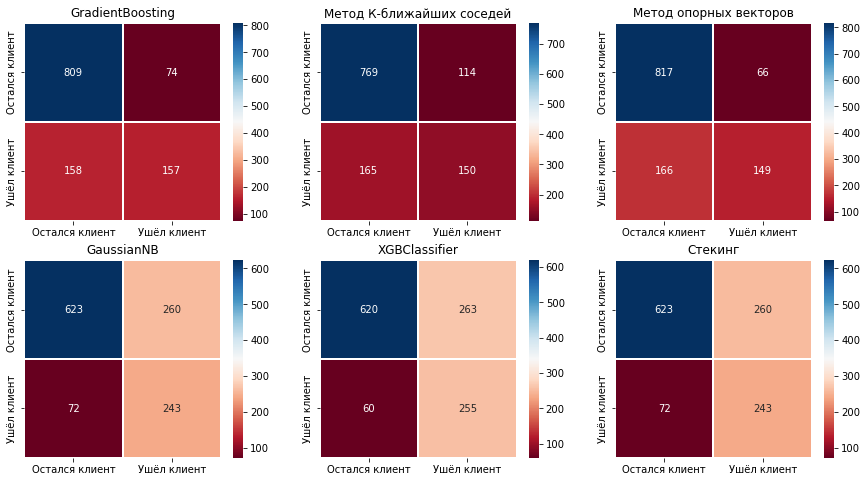

,AUC ROC,Точность,Полнота
GradientBoosting,0.707304,0.679654,0.498413
Метод К-ближайших соседей,0.673543,0.568182,0.476190
Метод опорных векторов,0.699135,0.693023,0.473016
GaussianNB,0.738489,0.483101,0.771429
XGBClassifier,0.755838,0.492278,0.809524
Стекинг,0.738489,0.483101,0.771429


In [37]:
# Определение размера диаграмм
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Создание визуализации матриц ошибок
for ax, y_predict, name in zip(axes.flat, predict_list, model_names):
    sns.heatmap(
        confusion_matrix(y_test, y_predict), cmap=colormap, 
        linewidths=0.1, linecolor='white', annot=True, fmt='d', 
        xticklabels=['Остался клиент', 'Ушёл клиент'], 
        yticklabels=['Остался клиент', 'Ушёл клиент'],
        ax=ax
    ).set_title(name)

# Вывод диаграмм
plt.show()

#  Вывод метрик каждой модели
pd.DataFrame({'AUC ROC': auc_list, 'Точность': precision_list, 'Полнота': recall_list}, index=model_names)

Модели: XGBoost, Байесовский классификатор и Стекинг, показали самые высокие  показатели метрик AUC ROC, Recall(Полнота) и низкими показателями ложноотрицательных значений.

**Метрики качества линейных моделей**



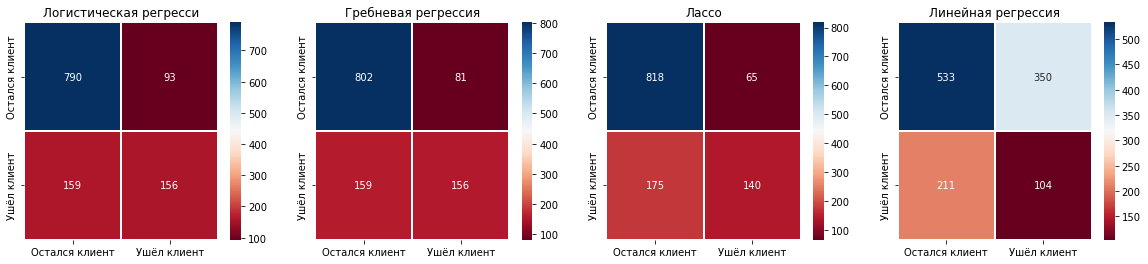

,AUC ROC,Точность,Полнота
Логистическая регресси,0.694958,0.626506,0.495238
Гребневая регрессия,0.832490,0.658228,0.495238
Лассо,0.839821,0.682927,0.444444
Линейная регрессия,0.555020,0.229075,0.330159


In [38]:
# список названий используемых моделей
lin_model_names = ['Логистическая регресси', 'Гребневая регрессия', 'Лассо', 'Линейная регрессия']

# список значений метрики ROC AUC
lin_auc_list = []
# список значений метрики точности
lin_precision_list = []
# список значений метрики полноты
lin_recall_list = []
# список предсказаний моделей
lin_predict_list = []

# определение метрик каждой модели
for n, model in enumerate(lin_models):
    model.fit(X_train_lin, y_train)
    y_pred = model.predict(X_test_lin)
    lin_auc_list.append(roc_auc_score(y_test, y_pred))
    try:
        lin_precision_list.append(precision_score(y_test, y_pred))
        lin_recall_list.append(recall_score(y_test, y_pred))
        lin_predict_list.append(y_pred)
    except ValueError:
        y_pred_new = np.where(y_pred > 0.5, 1, 0)
        lin_precision_list.append(precision_score(y_test, y_pred_new))
        lin_recall_list.append(recall_score(y_test, y_pred_new))
        lin_predict_list.append(y_pred_new)

# Определение размера диаграмм
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Вывод матриц ошибок
for ax, y_predict, name in zip(axes.flat, lin_predict_list, lin_model_names):
    sns.heatmap(
        confusion_matrix(y_test, y_predict), cmap=colormap, 
        linewidths=0.1, linecolor='white', annot=True, fmt='d', 
        xticklabels=['Остался клиент', 'Ушёл клиент'], 
        yticklabels=['Остался клиент', 'Ушёл клиент'],
        ax=ax
    ).set_title(name)

# Вывод диаграмм
plt.show()

#  Вывод метрик каждой модели
pd.DataFrame({'AUC ROC': lin_auc_list, 'Точность': lin_precision_list, 'Полнота': lin_recall_list}, index=lin_model_names)

Модель Лассо показала самую высокую значение мктрики (AUC ROC=0.84), но довольно низкий показатель полноты(Recall=0.44), что плохо для решения текущей задачи, поэтому эта модель проигрывает моделе XGBoost. В целом, модели Ридж и Лассо показали очень высокие показатели метрики AUC. Но, к сожалению, эти модели имеют высокие показатели ложно-отрицательных значений, т.е модели упускают клиентов собирающихся уйти.

**Вывод:**

Модель XGBoost имеет самую высокую метрику качества (AUC ROC=0.76) среди нелинейных моделей, а так же самый высокий показатель полноты(Recall=0.81). Метрика полноты означает наибольшую долю клиентов, по сравнению с другими моделями, для которых был верно определен класс. Матрицы ошибок моделей, так же, показывают, что у модели XGBoost, кол-во ложноотрицательных значений (количество клиентов, которые могут уйти, но ошибочно принятых за лояльных)(FN = 60) меньше, чем у других моделей, что так же важно для решения задачи. Высокое количество ложноположительных значений(количество лояльных клиентов, отнесенных к классу оттока)(FP=263), не так страшно и даже заставляет обратить на них внимание. Возможно, это те клиенты, которые могут расторгнуть договор в ближайшем будущем.
Поэтому, с помощью модели XGBoost попробуем определить какие именно клиенты способны уйти. Для этого снова обучим отобранную модель на всех данных(что конечно не совсем корректно, так как модель 'видела' часть данных, но возможно,  модель сможет 'засомневаться' в текущей оценке статуса клиента. Отберем только тех клиентов, которые, как считает модель, способны уйти. Исследуем распределение целевых классов в признаках этих клиентов. 

In [39]:
# Для того, чтоб можно было определить конкретных клиентов, добавим ID клиента
X = tel_users.drop(labels = ["Churn"],axis = 1)
X['ID'] = df_users['customerID']
# сохраним id клиентов в новую переменную
X_index = X['ID']
X = X.drop(['ID'], axis=1)
# стандартизация данных
X = StandardScaler().fit_transform(X)
# наиболее важные признаки
X = X[:, best_features]

In [40]:
# Получим вероятностные оценки нашей модели
xgb_pred_proba = np.round(models[1].fit(X_train, y_train).predict_proba(X)[:, 1], 2)
xgb_pred_proba_0 = np.round(models[1].fit(X_train, y_train).predict_proba(X)[:, 0], 2)
# создадим таблицу с вероятностями классов модели и реальными данными
df_pred_proba = pd.DataFrame({'XGBClassifier': xgb_pred_proba, 'XGBClassifier 0' : xgb_pred_proba_0})
df_pred_proba['Реальные оценки'] = y
# добавим ID клиентов
df_pred_proba['ID'] = X_index.tolist()
df_pred_proba.set_index('ID', inplace=True)
# выведем таблицу оценок модели, целевых данных и ID клиентов
df_pred_proba

,XGBClassifier,XGBClassifier 0,Реальные оценки
ID,,,
7010-BRBUU,0.04,0.96,0
9688-YGXVR,0.60,0.40,0
9286-DOJGF,0.66,0.34,1
6994-KERXL,0.70,0.30,0
2181-UAESM,0.62,0.38,0
...,...,...,...
0684-AOSIH,0.88,0.12,1
5982-PSMKW,0.10,0.90,0
8044-BGWPI,0.36,0.64,0


In [41]:
# Выделим всех клиентов, которых модель отнесла к классу оттока (True Positive Rate + False Negative Rate)
df_pred_proba_0 = df_pred_proba[['XGBClassifier 0', 'Реальные оценки']][df_pred_proba['XGBClassifier 0'] >= 0.5]
# Выделим всех клиентов, которых модель отнесла к классу оттока (True Negative Rate + False Positive Rate)
df_pred_proba = df_pred_proba[['XGBClassifier', 'Реальные оценки']][df_pred_proba['XGBClassifier'] >= 0.5]
# выедем таблицу оценок, в которых модель уверена
df_pred_proba.head(5)

,XGBClassifier,Реальные оценки
ID,,
9688-YGXVR,0.60,0
9286-DOJGF,0.66,1
6994-KERXL,0.70,0
2181-UAESM,0.62,0
2495-KZNFB,0.63,0


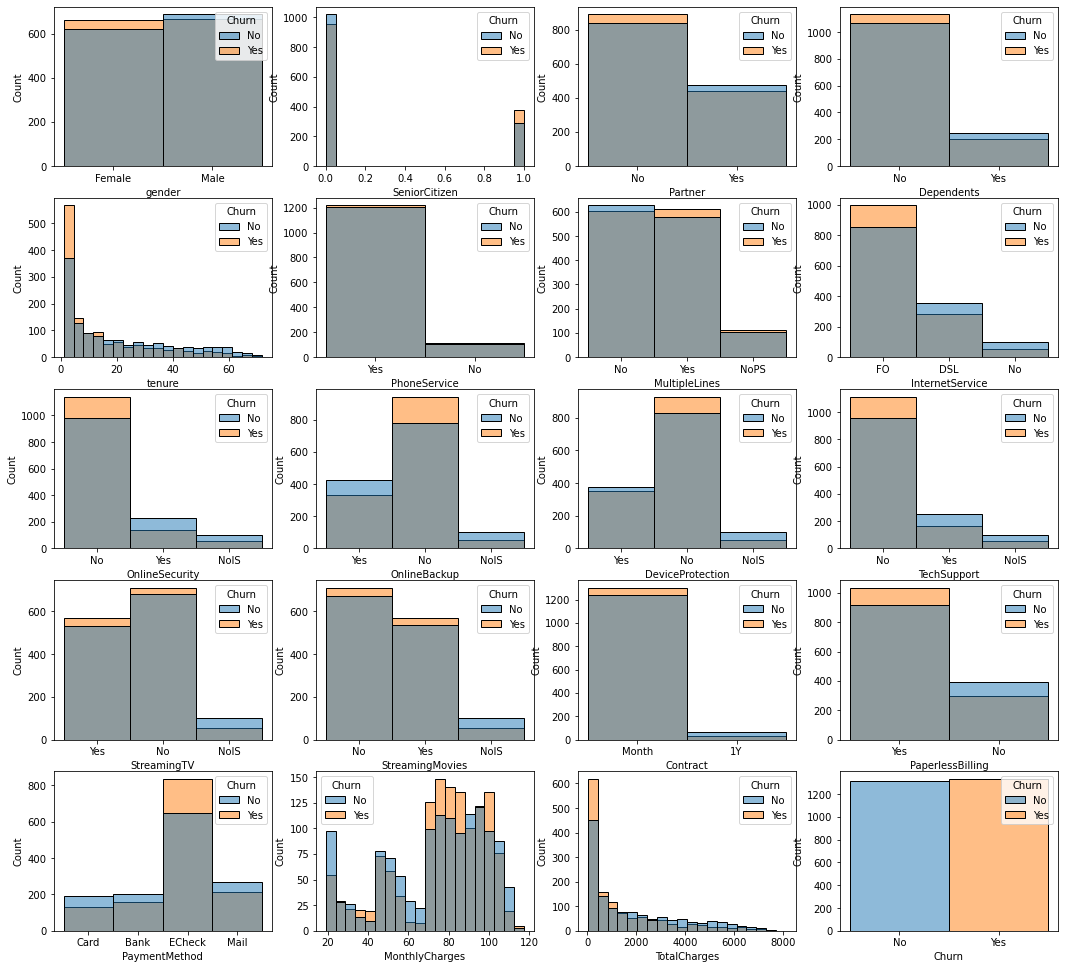

In [42]:
# Построим визуализацию для прогнозируемых классов True Positive Rate и False Positive Rate 
# Посмотрим, из-за каких признаков, модель ошиблась.
# немного обработаем данные 
for i,j in enumerate(df_users['TotalCharges']):
    if j == ' ':
      df_users['TotalCharges'][i] = df_users['tenure'][i] * df_users['MonthlyCharges'][i]
df_users['TotalCharges'] = df_users['TotalCharges'].astype(float)

df_users_id = df_users[df_users['customerID'].isin(df_pred_proba.index)]
df_users_id = df_users_id.drop(['Unnamed: 0', 'customerID'], axis=1)

new_values = {'No phone service': 'NoPS', 'No internet service': 'NoIS', 'Fiber optic': 'FO', 'Month-to-month': 'Month', 'One year': '1Y', 
              'Two year': '2Y', 'Electronic check': 'ECheck', 'Mailed check': 'Mail', 'Bank transfer (automatic)': 'Bank', 'Credit card (automatic)': 'Card'}

# Замена длинных названий на короткие
for column in df_users_id.columns:
    df_users_id[column] = df_users_id[column].apply(lambda x: new_values[x] if x in new_values else x)

# Получим обьекты класса Figure и Axses
fig, axes = plt.subplots(5, 4, figsize=(18,17))
for i, ax in zip(df_users_id, axes.flat):
  sns.histplot(data=df_users_id, x=i, hue='Churn', ax=ax, alpha=0.5, bins=20)

Соотношение лояльных клиентов и ушедших примерно одинаково. По данным видно, что различия между двумя группами имеют признаки: PaymentMethod, MonthlyCharges, TotalCharges, tenure. Значит, в основном, по этим признакам модель и разделяла клиентов по классам.

Различия соотношений разных классов в признаках, не велико, т.е модель считает клиентов, которые пока попали в группу лояльных - клиентами, которые похожи на тех, кто может покинуть компанию в будущем.

In [43]:
# Количество клиентов, потенциально способных прекратить сотрудничество в будущем.
print(f'Кол-во клиентов, которые способны уйти: {len(df_pred_proba[df_pred_proba["Реальные оценки"] == 0])} человек\n'
f'Кол-во клиентов, которые остануться: {len(df_pred_proba_0[df_pred_proba_0["Реальные оценки"] == 0])} человек.\n')

# Список идентификационных номеров клиентов, на которых необходимо обратить внимание.
pd.DataFrame({'ID клиента': df_pred_proba[df_pred_proba["Реальные оценки"] == 0].index})

Кол-во клиентов, которые способны уйти: 1310 человек
Кол-во клиентов, которые остануться: 3122 человек.



,ID клиента
0,9688-YGXVR
1,6994-KERXL
2,2181-UAESM
3,2495-KZNFB
4,4367-NHWMM
...,...
1305,6847-KJLTS
1306,7318-EIVKO
1307,9365-SRSZE
1308,2876-GZYZC


ВЫВОДЫ:
- Лучшей моделью выбран XGBoost. Он имеет самую высокую метрику качества (AUC ROC=0.76), а так же самый высокий показатель полноты(Recall=0.81). 

- Использованиеи линейных моделей - было хорошей практикой. Получились неплохие результаты. Но, к сожалению, в рамках данной задачи, линейные модели подходят хуже.

- признак tenure имеет обратную зависимость группы оттока с группой лояльных клиентов. Если человек является клиентом компании более 5 мес., то вероятность его ухода сильно снижается.

- Отсутствие техподдержки, а так же метод оплаты электронным чеком, влияют на отток.

- Гипотеза о том, что клиенты с низкими ежемесячными платежами (<30 ед.) вероятнее остануться с компанией, не является истинной, так как наибольший отток клиентов происходит при размере ежемесячного платежа - от примерно 70 до 95 ед. 

- Обратная корреляция признака Partner, а так же признаки OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, PaymentMethod_Electronic_check, тип контракта Month-to-month, интернет-провайдер Fiber optic,  не влияют на отток.
- Мы провели испытание модели на всех данных. Модель считает, что:

 - 1310 клиентов могут расторгнуть договор в ближайшем будущем. 

 - 3122 клиентов, которые скорее всего продлят контракт.

К вопросу о целесообразности проведения иследования оттока клиентов на всех данных: 

Ранее, модель на тестовых данных показала, что 620 клиентов готовы остаться, а 267 могут покинуть компанию. В последствии, модель была обучена так же на 80% от всех данных, но предсказания делала уже на всех данных. И не смотря на это, пересмотрела статус еще 1043 клиентов, переведя их из категории лояльных, к категории возможного оттока.